In [13]:
from IPython.display import Markdown

info_proyek = """
### Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Muhammad Azhar Putra Nadian  
- **Email:** azharnadian@student.ub.ac.id  
- **ID Dicoding:** azharnadian  
- **Cohort ID:** MC006D5Y1335  
- **Email Coding Camp:** mc006d5y1335@student.devacademy.id  
"""

display(Markdown(info_proyek))



### Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Muhammad Azhar Putra Nadian  
- **Email:** azharnadian@student.ub.ac.id  
- **ID Dicoding:** azharnadian  
- **Cohort ID:** MC006D5Y1335  
- **Email Coding Camp:** mc006d5y1335@student.devacademy.id  


In [17]:
pertanyaan_bisnis = """
### **Pertanyaan Bisnis:**
- **Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda harian?**
- **Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?**
"""

display(Markdown(pertanyaan_bisnis))


### **Pertanyaan Bisnis:**
- **Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda harian?**
- **Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?**


In [25]:
## Import Semua Packages/Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load Dataset day
day_df = pd.read_csv("data/day.csv")
display(day_df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [70]:
# Melihat 5 baris pertama dataset day
display(day_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
# Melihat informasi dataset day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [66]:
# Mengecek missing values day
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [68]:
# Mengecek duplikasi day
print(f"Duplikasi di day.csv: {day_df.duplicated().sum()}")

Duplikasi di day.csv: 0


In [60]:
# Load Dataset hour
hour_df = pd.read_csv("data/hour.csv")
display(hour_df)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [72]:
# Melihat 5 baris pertama dataset hour
display(hour_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [74]:
# Melihat informasi dataset hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [76]:
# Mengecek missing values hour
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [78]:
# Mengecek duplikasi hour
print(f"Duplikasi di hour.csv: {hour_df.duplicated().sum()}")

Duplikasi di hour.csv: 0


In [80]:
print('Tidak terdapat proses data cleaning karena data sudah bersih dan siap digunakan')

Tidak terdapat proses data cleaning karena data sudah bersih dan siap digunakan


In [88]:
## Exploratory Data Analysis (EDA)
# Statistik Deskriptif day
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [90]:
# Statistik Deskriptif hour
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

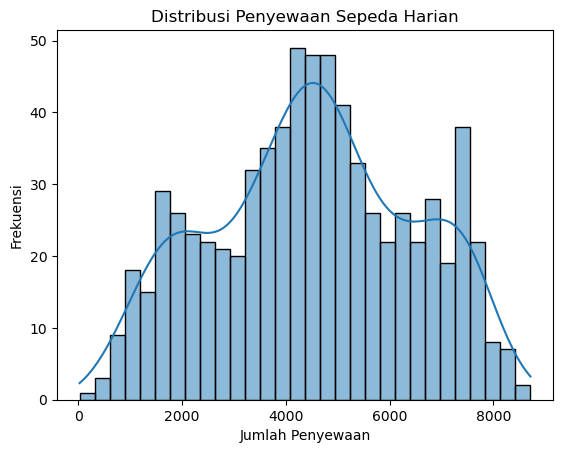

In [92]:
# Distribusi Penyewaan Sepeda
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

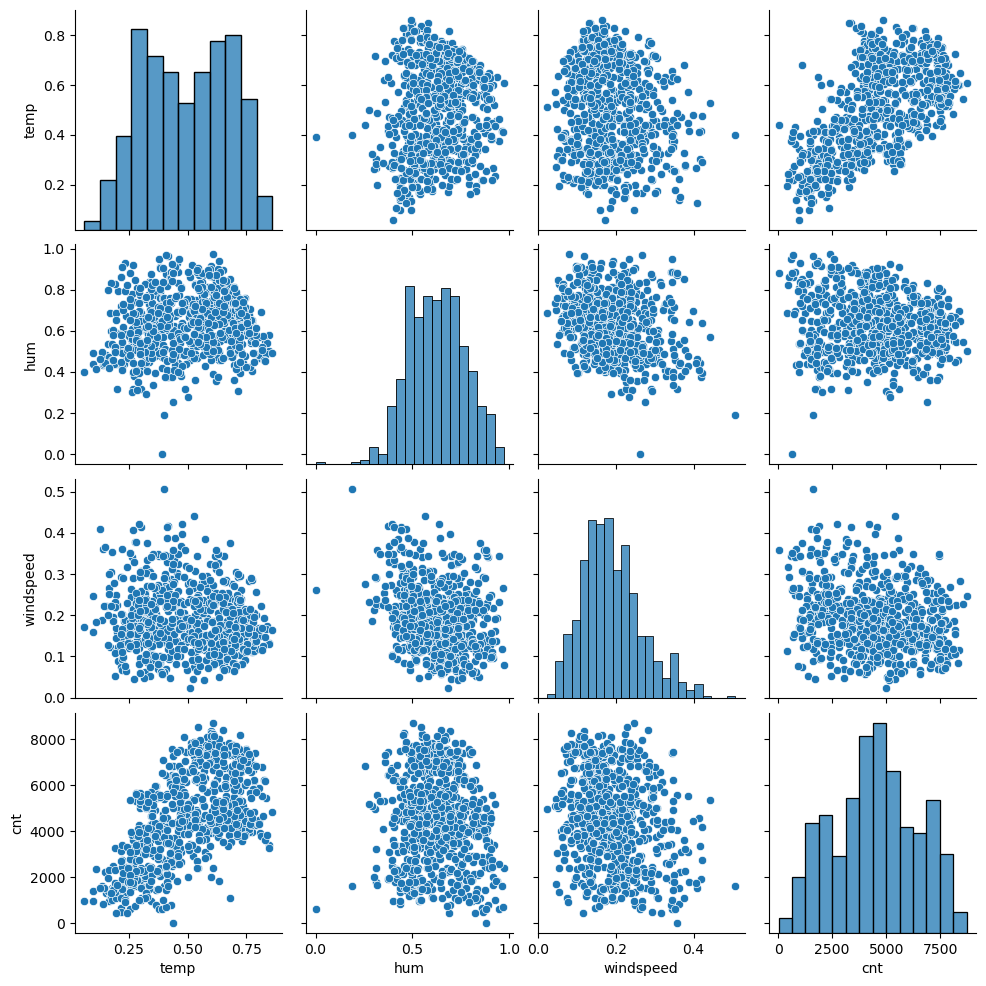

In [96]:
## Visualization & Explanatory Analysis
# Pertanyaan 1: Faktor apa yang mempengaruhi jumlah penyewaan sepeda harian?
sns.pairplot(day_df[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()

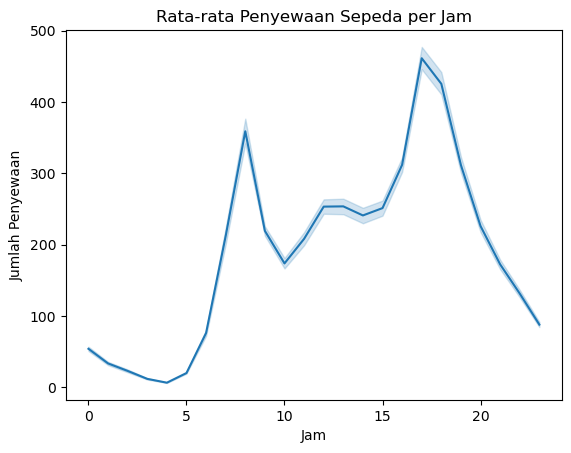

In [98]:
# Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?
sns.lineplot(data=hour_df, x='hr', y='cnt', estimator='mean')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

In [120]:
insight = """
### **Insight 1: Faktor yang Mempengaruhi Penyewaan Sepeda Harian**
Berdasarkan scatter plot yang telah dibuat, dapat dilihat bahwa:
- Temperatur memiliki korelasi positif dengan jumlah penyewaan sepeda. Semakin tinggi temperatur, semakin banyak sepeda yang disewa.
- Kelembapan (hum) dan kecepatan angin (windspeed) tidak menunjukkan korelasi yang kuat dengan jumlah penyewaan sepeda.

### **Insight 2: Pola Penyewaan Sepeda Berdasarkan Waktu**
Berdasarkan line plot jumlah penyewaan per jam dalam sehari:
- Ada dua puncak utama dalam penyewaan sepeda: pagi hari sekitar pukul "07:00-09:00" dan sore hari sekitar pukul "17:00-19:00".
- Puncak ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan pergi dan pulang kerja/sekolah).
- Penyewaan sepeda menurun di malam hari dan mencapai titik terendah antara pukul "00:00 - 05:00".
"""

display(Markdown(insight))


### **Insight 1: Faktor yang Mempengaruhi Penyewaan Sepeda Harian**
Berdasarkan scatter plot yang telah dibuat, dapat dilihat bahwa:
- Temperatur memiliki korelasi positif dengan jumlah penyewaan sepeda. Semakin tinggi temperatur, semakin banyak sepeda yang disewa.
- Kelembapan (hum) dan kecepatan angin (windspeed) tidak menunjukkan korelasi yang kuat dengan jumlah penyewaan sepeda.

### **Insight 2: Pola Penyewaan Sepeda Berdasarkan Waktu**
Berdasarkan line plot jumlah penyewaan per jam dalam sehari:
- Ada dua puncak utama dalam penyewaan sepeda: pagi hari sekitar pukul "07:00-09:00" dan sore hari sekitar pukul "17:00-19:00".
- Puncak ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan pergi dan pulang kerja/sekolah).
- Penyewaan sepeda menurun di malam hari dan mencapai titik terendah antara pukul "00:00 - 05:00".


In [122]:
conclusion = """
### Conclusion:
1. Temperatur memiliki dampak yang cukup besar terhadap jumlah penyewaan sepeda.
2. Pola penggunaan sepeda menunjukkan tren commuting, dengan puncak di pagi dan sore hari.
3. Faktor kelembapan dan kecepatan angin tidak terlalu berpengaruh terhadap jumlah penyewaan.
4. Jika ingin meningkatkan jumlah penyewaan, strategi promosi dapat difokuskan pada jam-jam sibuk serta meningkatkan kenyamanan bersepeda saat temperatur rendah atau ekstrem.
"""

display(Markdown(conclusion))


### Conclusion:
1. Temperatur memiliki dampak yang cukup besar terhadap jumlah penyewaan sepeda.
2. Pola penggunaan sepeda menunjukkan tren commuting, dengan puncak di pagi dan sore hari.
3. Faktor kelembapan dan kecepatan angin tidak terlalu berpengaruh terhadap jumlah penyewaan.
4. Jika ingin meningkatkan jumlah penyewaan, strategi promosi dapat difokuskan pada jam-jam sibuk serta meningkatkan kenyamanan bersepeda saat temperatur rendah atau ekstrem.


In [126]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)
all_df.to_csv("all_data.csv", index=False)